<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

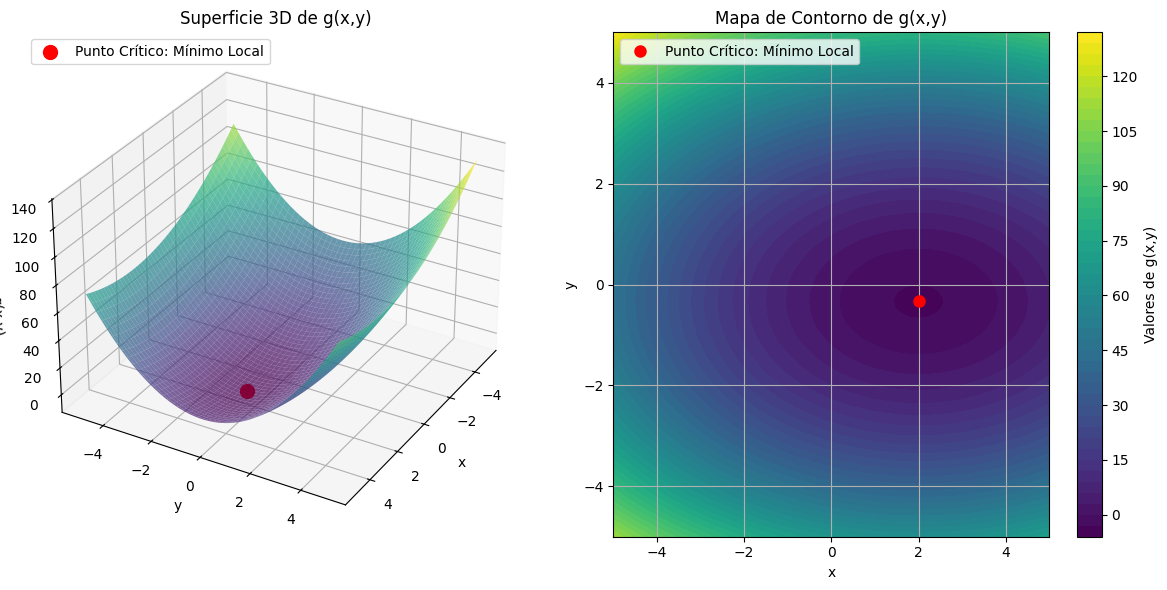

In [ ]:
"""
Análisis simbólico y visual de una función en dos variables.

Este programa realiza las siguientes tareas:
- Define una función g(x, y) en dos variables simbólicas.
- Calcula sus derivadas parciales, gradiente y matriz Hessiana.
- Encuentra y clasifica el punto crítico de la función usando la matriz Hessiana.
- Visualiza la función y el punto crítico en 2D y 3D usando Matplotlib.
"""

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math


def definir_funcion():
    """
    Define la función simbólica g(x, y).

    Returns:
        tuple: símbolos x, y, función g.
    """
    x, y = sp.symbols("x y")
    g = x**2 + 3 * y**2 - 4 * x + 2 * y + 1
    display(Math(r"\text{Función }g(x, y) = " + sp.latex(g)))
    return x, y, g


def analizar_funcion(x, y, g):
    """
    Calcula derivadas, gradiente, Hessiana y punto crítico.

    Args:
        x (sympy.Symbol): variable x
        y (sympy.Symbol): variable y
        g (sympy.Expr): función g(x, y)

    Returns:
        dict: resultados simbólicos y numéricos
    """
    # Derivadas parciales
    dg_dx = sp.diff(g, x)
    dg_dy = sp.diff(g, y)
    display(Math(r"\frac{\partial g}{\partial x} = " + sp.latex(dg_dx)))
    display(Math(r"\frac{\partial g}{\partial y} = " + sp.latex(dg_dy)))

    # Gradiente
    grad = sp.Matrix([dg_dx, dg_dy])
    display(Math(r"\nabla g(x, y) = " + sp.latex(grad)))

    # Hessiana
    hess = sp.hessian(g, (x, y))
    display(Math(r"H_g(x, y) = " + sp.latex(hess)))

    # Punto crítico
    criticos = sp.solve(grad, (x, y))
    pcx = criticos[x]
    pcy = criticos[y]
    display(Math(r"\text{Punto crítico: } (" + sp.latex(pcx) + r",\ " + sp.latex(pcy) + r")"))

    # Hessiana evaluada en el punto crítico
    hess_eval = hess.subs({x: pcx, y: pcy})
    display(Math(r"H_g(" + sp.latex(pcx) + "," + sp.latex(pcy) + r") = " + sp.latex(hess_eval)))

    # Valores propios
    eigvals = hess_eval.eigenvals()
    texto_vp = r"\text{Valores propios: } " + ",\ ".join([f"{sp.latex(k)}^{v}" for k, v in eigvals.items()]) + r"\text{, el exponente indica la multiplicidad}"
    display(Math(texto_vp))

    # Clasificación
    vp_reales = [float(vp) for vp in eigvals.keys()]
    if all(vp > 0 for vp in vp_reales):
        clasificacion = "Mínimo Local"
    elif all(vp < 0 for vp in vp_reales):
        clasificacion = "Máximo Local"
    elif any(vp > 0 for vp in vp_reales) and any(vp < 0 for vp in vp_reales):
        clasificacion = "Punto de Silla"
    else:
        clasificacion = "No se puede clasificar con este criterio"

    display(Math(r"\text{Clasificación del punto crítico: } \quad \boxed{" + clasificacion + "}"))

    return {"dg_dx": dg_dx, "dg_dy": dg_dy, "grad": grad, "hess": hess, "punto_critico": (pcx, pcy), "clasificacion": clasificacion, "g": g}


def visualizar_funcion(x, y, g, punto_critico, clasificacion):
    """
    Genera gráficos 3D y de contorno de la función g(x, y).

    Args:
        x (sympy.Symbol): variable x
        y (sympy.Symbol): variable y
        g (sympy.Expr): función g(x, y)
        punto_critico (tuple): coordenadas (x, y) del punto crítico
        clasificacion (str): tipo de punto crítico
    """
    g_num = sp.lambdify((x, y), g, "numpy")
    pcx, pcy = float(punto_critico[0]), float(punto_critico[1])
    pcz = float(g_num(pcx, pcy))

    # Malla de puntos
    rango_x = np.linspace(-5, 5, 100)
    rango_y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(rango_x, rango_y)
    Z = g_num(X, Y)

    fig = plt.figure(figsize=(12, 6))

    # Gráfico 3D
    ax1 = fig.add_subplot(121, projection="3d")
    ax1.view_init(elev=30, azim=30)
    ax1.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7)
    ax1.scatter(pcx, pcy, pcz, color="red", s=100, label=f"Punto Crítico: {clasificacion}", depthshade=True)
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("g(x,y)")
    ax1.set_title("Superficie 3D de g(x,y)")
    ax1.legend(loc="upper left")
    ax1.grid(True)

    # Gráfico de contorno
    ax2 = fig.add_subplot(122)
    contorno = ax2.contourf(X, Y, Z, levels=50, cmap="viridis")
    fig.colorbar(contorno, ax=ax2, label="Valores de g(x,y)")
    ax2.plot(pcx, pcy, "ro", markersize=8, label=f"Punto Crítico: {clasificacion}")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_title("Mapa de Contorno de g(x,y)")
    ax2.legend(loc="upper left")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


# Ejecución principal
if __name__ == "__main__":
    x, y, g = definir_funcion()
    resultado = analizar_funcion(x, y, g)
    visualizar_funcion(x, y, resultado["g"], resultado["punto_critico"], resultado["clasificacion"])


# Discusión sobre la Relación con Machine Learning:

El cálculo del gradiente y la clasificación de puntos críticos son conceptos fundamentales en el ámbito del Machine Learning,
especialmente en los algoritmos de optimización.

1. Descenso de Gradiente (Gradient Descent):
    En Machine Learning, muchos modelos se entrenan minimizando una función de costo (o pérdida) que mide la diferencia
    entre las predicciones del modelo y los valores reales. El objetivo es encontrar los parámetros del modelo que minimicen
    esta función de costo.
    El descenso de gradiente es un algoritmo de optimización iterativo que se basa en el cálculo del gradiente de la función
    de costo con respecto a los parámetros del modelo. El gradiente apunta en la dirección de mayor ascenso de la función.
    Por lo tanto, para minimizar la función de costo, el algoritmo ajusta los parámetros en la dirección opuesta al gradiente
    (la dirección de mayor descenso).
    Cada paso de actualización de los parámetros es proporcional al gradiente de la función de costo. De manera similar a cómo
    calculamos el gradiente nabla g(x,y) en esta actividad para encontrar la dirección de mayor cambio en g(x,y),
    el descenso de gradiente utiliza el gradiente de la función de costo para encontrar la dirección en la que los parámetros
    deben ser ajustados para reducir el error del modelo.

2. Puntos Críticos y Optimización:
    Los puntos críticos de una función (donde el gradiente es cero) son candidatos a ser mínimos, máximos o puntos de silla.
    En el contexto del entrenamiento de modelos, un mínimo local (o idealmente global) de la función de costo representa un
    conjunto óptimo de parámetros para el modelo. La clasificación de estos puntos críticos, utilizando la matriz Hessiana
    (que contiene las segundas derivadas parciales y nos permite analizar la curvatura de la función), es crucial para
    entender la naturaleza de estos puntos en el paisaje de la función de costo.
    Si bien el descenso de gradiente busca activamente llegar a un mínimo (un punto crítico clasificado como mínimo local),
    es importante ser consciente de la existencia de puntos de silla o mínimos locales que no son globales, lo que puede
    afectar la convergencia y el rendimiento final del modelo.
    La capacidad de calcular y analizar estos elementos matemáticos nos permite comprender mejor el comportamiento de las
    funciones de costo complejas y desarrollar algoritmos de optimización más robustos y eficientes para entrenar modelos
    de Machine Learning.